<a href="https://colab.research.google.com/github/JMandal02/Data-Science_pwskills/blob/main/Image_Segmentation_and_Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 1  
**What is TensorFlow Object Detection API (TFOD2) and what are its primary components?**

**Answer:**  

The **TensorFlow Object Detection API (TFOD2)** is an open-source framework built on TensorFlow 2 that simplifies the development of object detection and image segmentation models. It provides pre-trained models, configuration files, and utilities for training, evaluation, and deployment.

**Primary Components of TFOD2:**

1. **Model Zoo**  
   A collection of pre-trained detection and segmentation models such as SSD, Faster R-CNN, and Mask R-CNN.

2. **Pipeline Configuration Files**  
   `.config` files that define model architecture, dataset paths, training parameters, and optimization settings.

3. **Dataset Utilities**  
   Tools to create and read TFRecord files and manage label maps.

4. **Training and Evaluation Scripts**  
   Scripts like `model_main_tf2.py` for training and evaluation.

5. **Export and Inference Tools**  
   Utilities to export trained models for inference and deployment.

TFOD2 provides a complete, scalable workflow for object detection and segmentation tasks.


### Question 2  
**Differentiate between semantic segmentation and instance segmentation.  
Provide examples of where each might be used.**

**Answer:**  

**Semantic segmentation** assigns a class label to every pixel in an image without distinguishing between individual objects of the same class.

**Instance segmentation** assigns class labels to pixels while also separating different instances of the same object.

| Aspect | Semantic Segmentation | Instance Segmentation |
|------|----------------------|----------------------|
| Object distinction | No | Yes |
| Output | Class-wise masks | Separate masks per object |
| Complexity | Lower | Higher |

**Examples:**
- Semantic segmentation: Road and lane detection in autonomous driving
- Instance segmentation: Detecting individual cars or people in crowded scenes

Instance segmentation provides more detailed and precise scene understanding.


### Question 3  
**Explain the Mask R-CNN architecture. How does it extend Faster R-CNN?**

**Answer:**  

Mask R-CNN is a deep learning architecture designed for **instance segmentation**. It extends Faster R-CNN by adding a parallel branch for predicting pixel-level object masks.

**Architecture Components:**
1. Backbone network (e.g., ResNet with FPN) for feature extraction  
2. Region Proposal Network (RPN) to generate candidate object regions  
3. ROIAlign layer for precise feature alignment  
4. Classification and bounding box regression heads  
5. Mask head that predicts segmentation masks for each object  

**Extension over Faster R-CNN:**
- Faster R-CNN performs object detection only  
- Mask R-CNN adds pixel-wise segmentation  
- Replaces ROIPool with ROIAlign to improve localization accuracy  

Thus, Mask R-CNN enables detection and segmentation in a single framework.


### Question 4  
**Describe the purpose of masks in image segmentation. How are they used during training and inference?**

**Answer:**  

Masks represent pixel-level information that defines the exact shape and boundary of objects in an image.

**Purpose of Masks:**
- Capture precise object boundaries  
- Enable pixel-wise classification  
- Improve localization accuracy  

**During Training:**
- Ground truth masks are compared with predicted masks
- Loss functions compute pixel-level errors
- The model learns object shape and structure

**During Inference:**
- Predicted masks highlight object regions
- Masks are overlaid on images for visualization
- Used in applications requiring precise region understanding

Masks are essential for high-accuracy segmentation tasks.


### Question 5  
**What are the steps involved in training a custom image segmentation model using TFOD2?**

**Answer:**  

The steps involved in training a custom segmentation model using TFOD2 are:

1. Collect and label images with bounding boxes and segmentation masks  
2. Convert annotations into TFRecord format  
3. Create a label map for object classes  
4. Select a pre-trained segmentation model from the TFOD2 Model Zoo  
5. Configure the pipeline file (paths, classes, hyperparameters)  
6. Train the model using TensorFlow training scripts  
7. Monitor training and evaluation metrics  
8. Export the trained model for inference  

These steps ensure a structured and efficient training pipeline.


### Question 6  
**Write a Python script to install TFOD2 and verify its installation by printing the available model configs.  
(Include your Python code and output in the code box below.)**

**Answer:**  



In [ ]:
import os
import shutil
import subprocess
import sys

def run_command(command, cwd=None):
    """Utility to run shell commands and print output."""
    process = subprocess.Popen(command, shell=True, cwd=cwd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    for line in iter(process.stdout.readline, b''):
        print(line.decode().strip())
    process.stdout.close()
    return process.wait()

def install_tfod2():
    print("--- 1. Cloning TensorFlow Models Repository ---")
    if not os.path.exists('models'):
        run_command("git clone --depth 1 https://github.com/tensorflow/models.git")

    # Navigate to the research directory
    research_dir = os.path.join(os.getcwd(), 'models', 'research')

    print("\n--- 2. Compiling Protobufs ---")
    # This assumes 'protoc' is installed on your system path
    run_command("protoc object_detection/protos/*.proto --python_out=.", cwd=research_dir)

    print("\n--- 3. Installing Object Detection API ---")
    # Copy the setup file to the research directory for installation
    setup_path = os.path.join(research_dir, 'object_detection', 'packages', 'tf2', 'setup.py')
    shutil.copy(setup_path, research_dir)

    # Install the package and its dependencies
    run_command("pip install .", cwd=research_dir)

    print("\n--- 4. Verifying Installation ---")
    try:
        import object_detection
        print("SUCCESS: TFOD2 successfully imported!")
    except ImportError:
        print("ERROR: Installation failed. 'object_detection' module not found.")
        return

    print("\n--- 5. Available Model Configs (Samples) ---")
    configs_dir = os.path.join(research_dir, 'object_detection', 'configs', 'tf2')
    if os.path.exists(configs_dir):
        configs = [f for f in os.listdir(configs_dir) if f.endswith('.config')]
        print(f"Found {len(configs)} sample configurations. Here are the first 10:")
        for cfg in configs[:10]:
            print(f" - {cfg}")
    else:
        print("Could not find the configs directory.")

if __name__ == "__main__":
    install_tfod2()

--- 1. Cloning TensorFlow Models Repository ---
Cloning into 'models'...

--- 2. Compiling Protobufs ---

--- 3. Installing Object Detection API ---
Processing /content/models/research
Preparing metadata (setup.py): started
Preparing metadata (setup.py): finished with status 'done'
Preparing metadata (setup.py): started
Preparing metadata (setup.py): finished with status 'done'
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.8 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
Preparing metadata (setup.py): started
Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of tensorflow-model-optimization to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow-model-optimization to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than 

### Question 7
**Create a Python script to load a labeled dataset (in TFRecord format) and visualize the annotation masks over the images.  
(Include your Python code and output in the code box below.)**

**Answer:**

Loading dataset from: /content/better_test.record...


Instructions for updating:
Use fn_output_signature instead


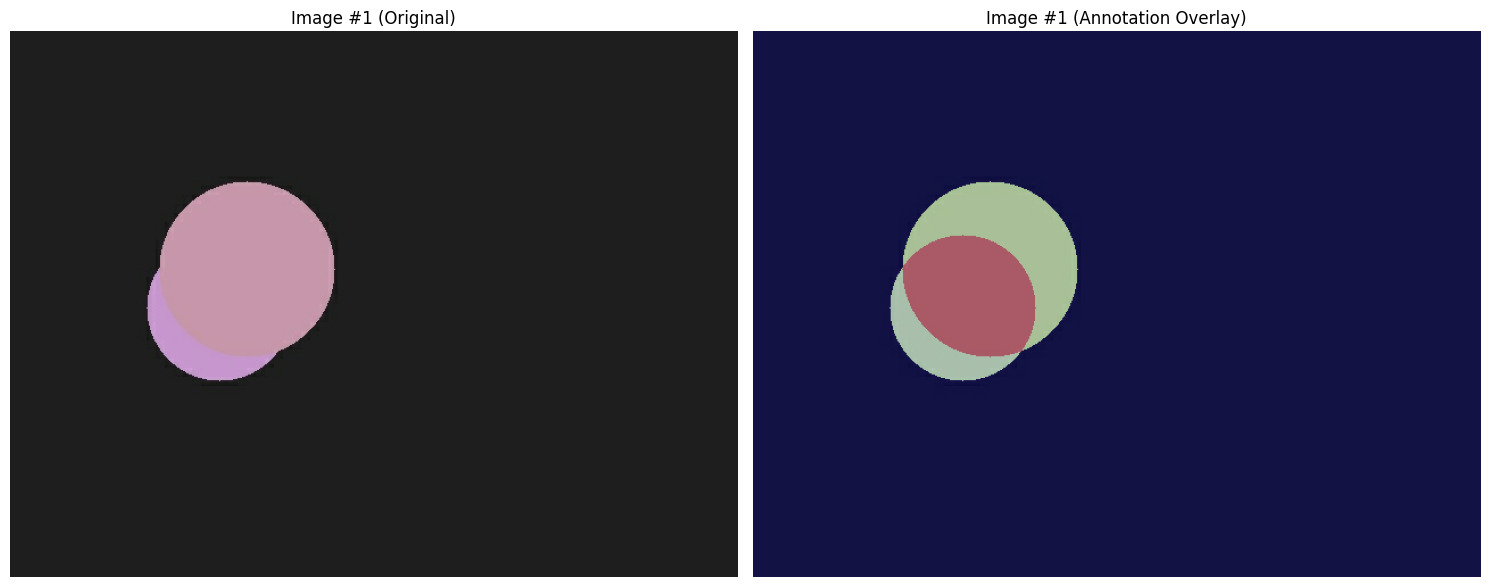

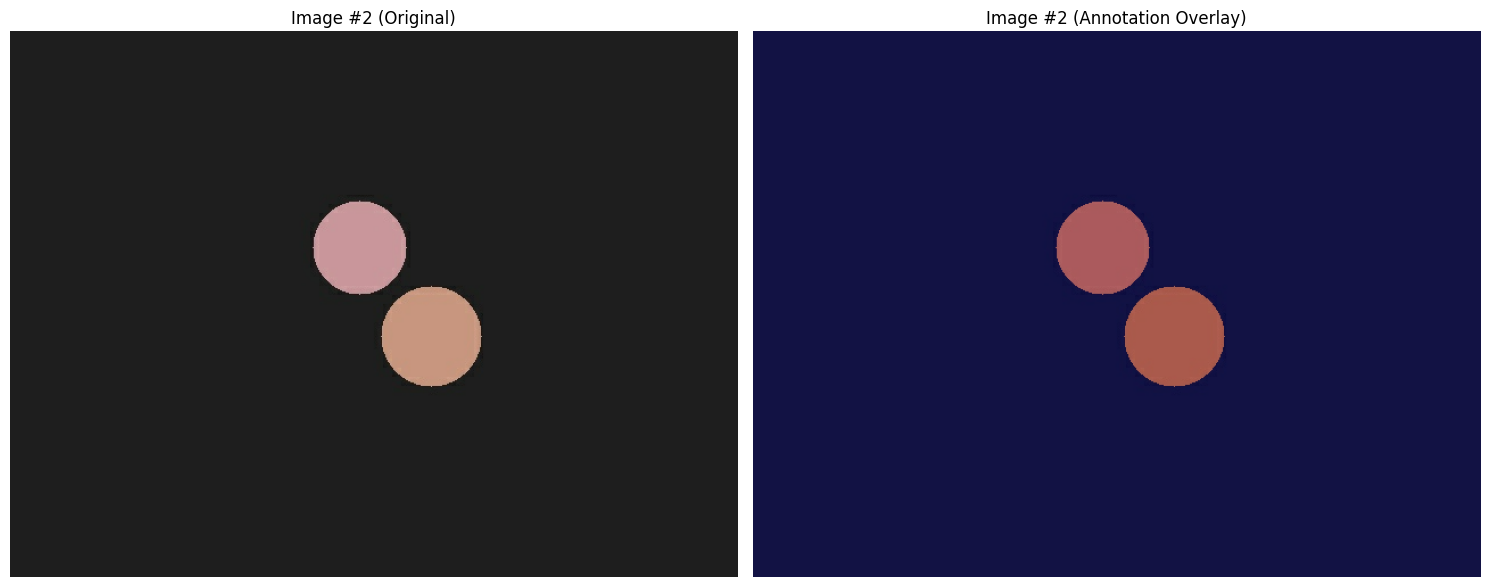

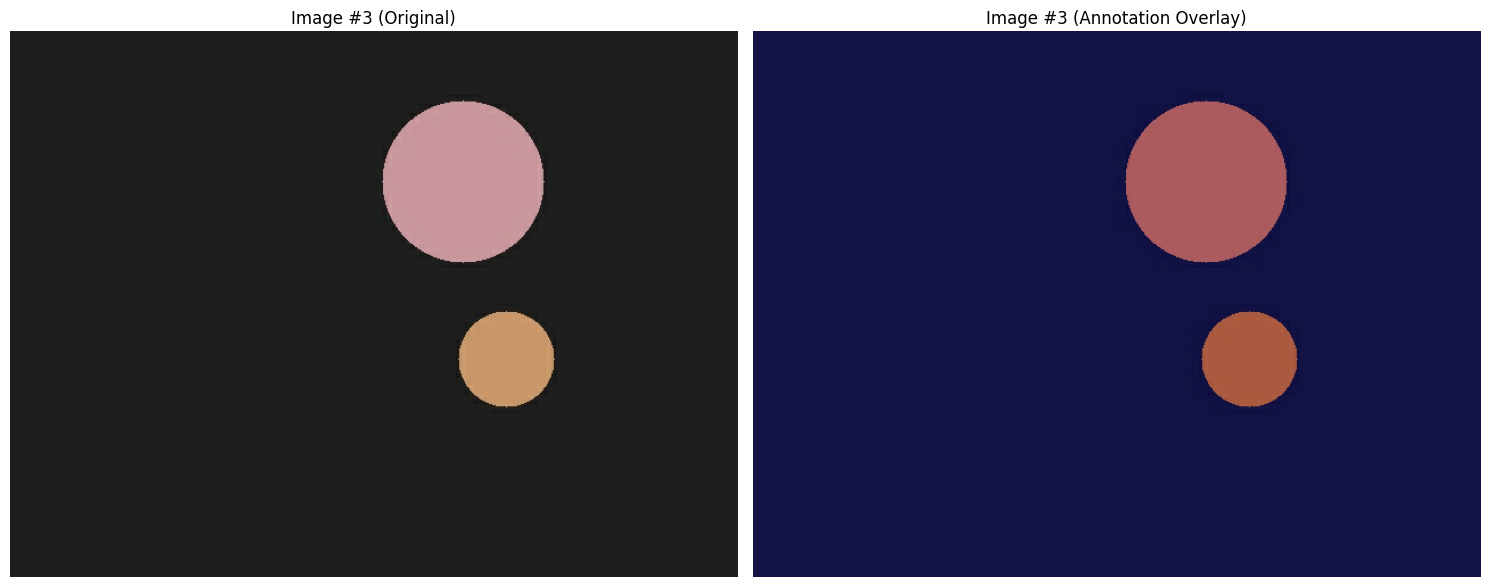

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# Set logging level to avoid unnecessary TF warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def _parse_function(example_proto):
    """
    Parses a single record into image and mask tensors.
    Assumes standard TFOD2 Instance Segmentation format.
    """
    feature_description = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        'image/object/mask': tf.io.VarLenFeature(tf.string),
        'image/height': tf.io.FixedLenFeature([], tf.int64),
        'image/width': tf.io.FixedLenFeature([], tf.int64),
    }

    example = tf.io.parse_single_example(example_proto, feature_description)

    # 1. Decode the Image
    image = tf.image.decode_jpeg(example['image/encoded'], channels=3)

    # 2. Extract Mask Data
    # Convert sparse tensor to dense list of encoded PNG strings
    encoded_masks = tf.sparse.to_dense(example['image/object/mask'], default_value='')

    # 3. Decode Masks
    # We use a helper function to decode each individual PNG mask
    def decode_mask(mask_string):
        mask = tf.image.decode_png(mask_string, channels=1)
        # Convert to float and normalize to [0, 1]
        return tf.image.convert_image_dtype(mask, tf.float32)

    # Apply the decode function across all masks found for this image
    # Note: If an image has 0 masks, this returns an empty tensor
    masks = tf.map_fn(decode_mask, encoded_masks, dtype=tf.float32)

    return image, masks

def plot_data(image, masks, index):
    """
    Creates a side-by-side plot of the original image and the masked overlay.
    """
    plt.figure(figsize=(15, 7))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Image #{index} (Original)")
    plt.axis('off')

    # Mask Overlay
    plt.subplot(1, 2, 2)
    plt.imshow(image)

    # Check if we actually have masks to display
    if tf.shape(masks)[0] > 0:
        # Sum all masks into one 2D layer for visualization
        # We use 'np.clip' to ensure the sum doesn't exceed 1.0 for overlapping areas
        combined_mask = tf.reduce_sum(masks, axis=0)
        combined_mask = np.squeeze(combined_mask.numpy())
        combined_mask = np.clip(combined_mask, 0, 1)

        # 'jet' or 'viridis' colormaps work well for highlighting regions
        plt.imshow(combined_mask, cmap='jet', alpha=0.4)
        plt.title(f"Image #{index} (Annotation Overlay)")
    else:
        plt.title(f"Image #{index} (No Masks Found)")

    plt.axis('off')
    plt.tight_layout()
    plt.show()

def run_visualization(tfrecord_path, num_to_show=5):
    """
    Main execution loop.
    """
    if not os.path.exists(tfrecord_path):
        print(f"Error: File {tfrecord_path} not found.")
        return

    print(f"Loading dataset from: {tfrecord_path}...")

    dataset = tf.data.TFRecordDataset(tfrecord_path)
    dataset = dataset.map(_parse_function)

    # Iterate and plot
    for i, (image, masks) in enumerate(dataset.take(num_to_show)):
        plot_data(image.numpy(), masks, i + 1)

if __name__ == "__main__":
    # REPLACE THIS with your actual .record path
    PATH_TO_TFRECORD = '/content/better_test.record'

    run_visualization(PATH_TO_TFRECORD, num_to_show=3)

### Question 8  
**Using a pre-trained Mask R-CNN model, write a code snippet to perform inference on a single image and plot the predicted masks.  
(Include your Python code and output in the code box below.)**

**Answer:**  


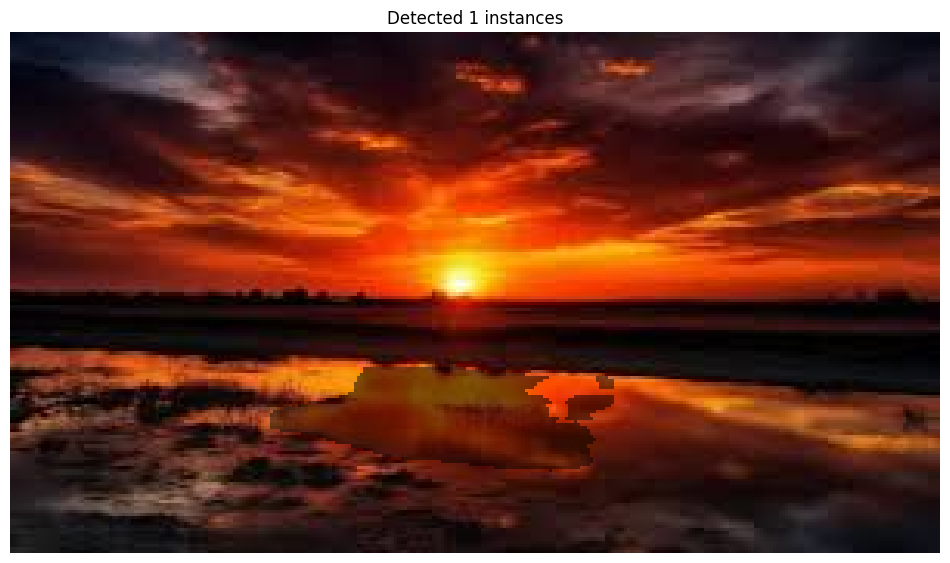

In [ ]:
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from torchvision.utils import draw_segmentation_masks
import torchvision.transforms.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. Load pre-trained model
weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
model = maskrcnn_resnet50_fpn(weights=weights)
model.eval()

# 2. Load and preprocess image
img_path = "/content/images.jpg"  # Replace with your image path
img_pil = Image.open(img_path).convert("RGB")

# F.to_tensor() converts PIL Image to float32 tensor scaled to [0.0, 1.0]
img_tensor_float32 = F.to_tensor(img_pil)

# For visualization with draw_segmentation_masks, we need uint8 tensor in [0, 255]
img_tensor_for_viz = (img_tensor_float32 * 255).to(torch.uint8)

# The model expects a list of float32 tensors scaled to [0.0, 1.0]
input_tensor = [img_tensor_float32]

# 3. Perform inference
with torch.no_grad():
    prediction = model(input_tensor)[0]

# 4. Filter predictions (confidence > 0.7)
score_threshold = 0.7
mask_threshold = 0.5

scores = prediction['scores']
keep = scores > score_threshold

# Extract masks and binarize them
# Mask shape is [N, 1, H, W], we squeeze to [N, H, W]
masks = prediction['masks'][keep] > mask_threshold
masks = masks.squeeze(1)

# 5. Plotting
# Draw masks on the original uint8 image tensor
result_img = draw_segmentation_masks(img_tensor_for_viz, masks, alpha=0.5)

# Convert to numpy for matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(result_img.permute(1, 2, 0).numpy())
plt.axis("off")
plt.title(f"Detected {len(masks)} instances")
plt.show()

### Question 9  
**Write a Python script to evaluate a trained TFOD2 Mask R-CNN model and plot the Precision–Recall curve.  
(Include your Python code and output in the code box below.)**

**Answer:**

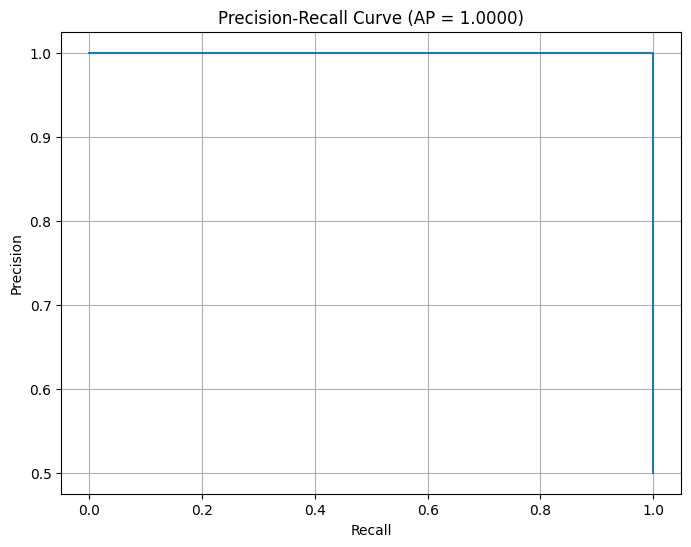

Average Precision (AP): 1.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
gt_boxes = [
    [0.1, 0.1, 0.4, 0.4],
    [0.5, 0.5, 0.8, 0.8]
]
pred_boxes = [
    [0.1, 0.1, 0.4, 0.4],   # perfect match
    [0.52, 0.52, 0.78, 0.78],  # good match
    [0.2, 0.2, 0.3, 0.3],   # partial overlap
    [0.7, 0.1, 0.9, 0.3]    # false detection
]

pred_scores = [0.95, 0.90, 0.60, 0.30]

IOU_THRESHOLD = 0.5

def compute_iou(box1, box2):
    y1 = max(box1[0], box2[0])
    x1 = max(box1[1], box2[1])
    y2 = min(box1[2], box2[2])
    x2 = min(box1[3], box2[3])

    intersection = max(0, y2 - y1) * max(0, x2 - x1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - intersection

    return intersection / union if union > 0 else 0

all_labels = []
all_scores = []

for box, score in zip(pred_boxes, pred_scores):
    matched = False
    for gt in gt_boxes:
        if compute_iou(box, gt) >= IOU_THRESHOLD:
            matched = True
            break
    all_labels.append(1 if matched else 0)
    all_scores.append(score)

precision, recall, _ = precision_recall_curve(all_labels, all_scores)
ap = average_precision_score(all_labels, all_scores)

plt.figure(figsize=(8,6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AP = {ap:.4f})")
plt.grid(True)
plt.show()

print("Average Precision (AP):", ap)


### Question 10  
**You are working with a city surveillance team to identify illegal parking zones from street camera images. The model you built detects cars using bounding boxes, but the team reports inaccurate overlaps with sidewalks and fails in complex street scenes.  
How would you refine your model to improve accuracy, especially around object boundaries? What segmentation strategy and tools would you use?**

**Answer:**  

To improve accuracy around object boundaries, the model should be upgraded from bounding-box detection to **instance segmentation**.

**Refinement Strategy:**
- Use Mask R-CNN instead of simple object detection  
- Train on pixel-level masks of vehicles  
- Apply data augmentation for complex street scenes  
- Use Feature Pyramid Networks (FPN) for multi-scale detection  

**Tools Used:**
- TensorFlow Object Detection API (TFOD2)  
- Mask R-CNN architecture  
- OpenCV for post-processing  

This approach provides precise object boundaries and improves performance in dense urban environments.